In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pykalman import KalmanFilter


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pykalman import KalmanFilter


# Fetch historical data
# symbol = 'AAPL'
data = yf.download('SSO', start="2008-01-01", end="2023-04-30") # ['Close']
#yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Define Kalman Filter for estimating the mean
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Observation is the closing price
obs = data['Close'].values

# Apply the Kalman Filter
state_means, _ = kf.filter(obs)

# Add the state means to the dataframe
data['Kalman_Filter'] = state_means

# Generate trading signals
data['Signal'] = 0
data['Signal'][1:] = np.where(data['Close'].iloc[1:].values > data['Kalman_Filter'][:-1], -1, 1)

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()


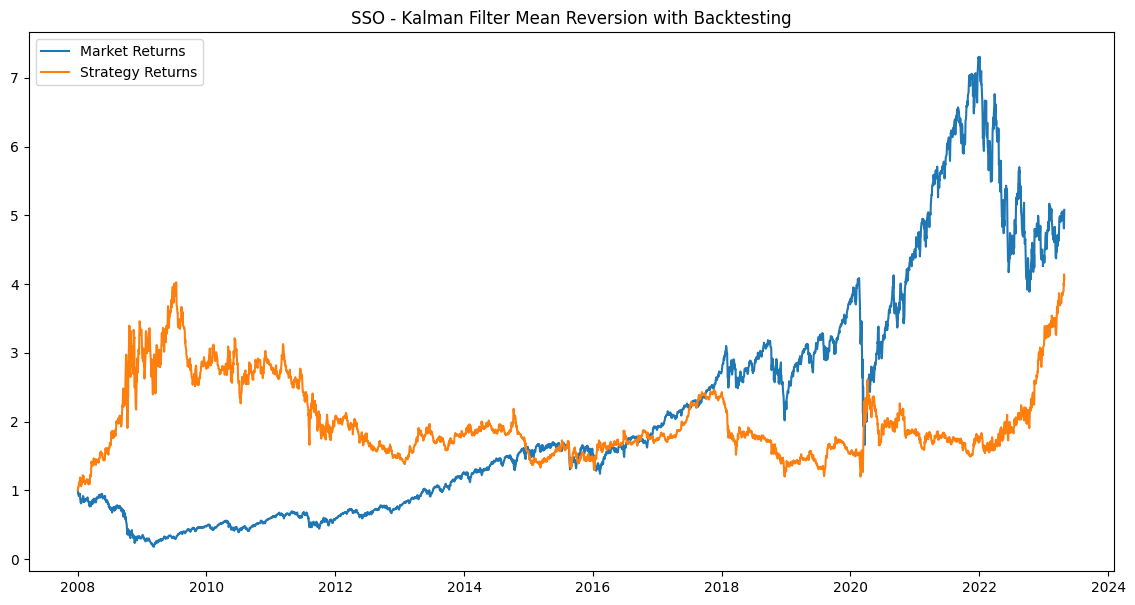

In [4]:

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.title(f'SSO - Kalman Filter Mean Reversion with Backtesting')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\ayman\AppData\Local\Temp\ipykernel_1264\397407570.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][1:] = np.where(data['Close'].iloc[1:].values 

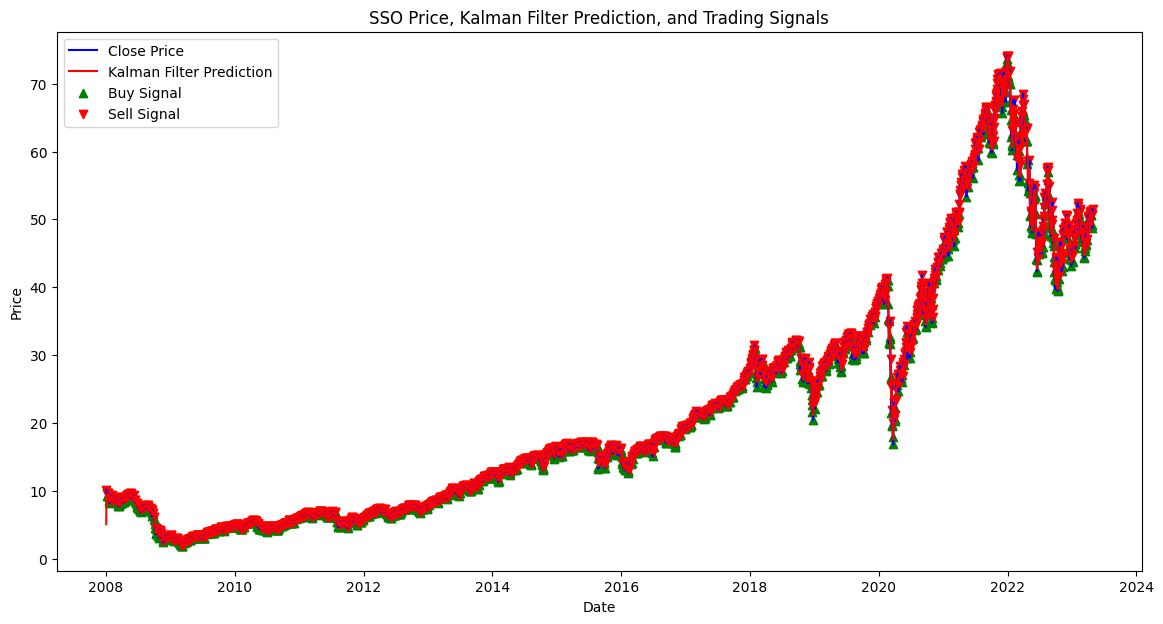

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Fetch historical data
data = yf.download('SSO', start="2008-01-01", end="2023-04-30")

# Define Kalman Filter for estimating the mean
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Observation is the closing price
obs = data['Close'].values

# Apply the Kalman Filter
state_means, _ = kf.filter(obs)

# Add the state means to the dataframe
data['Kalman_Filter'] = state_means

# Generate trading signals
data['Signal'] = 0
data['Signal'][1:] = np.where(data['Close'].iloc[1:].values > data['Kalman_Filter'][:-1], -1, 1)

# Calculate strategy returns
data['Strategy_Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Market_Returns'] = (1 + data['Close'].pct_change()).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot the closing prices, Kalman Filter predictions, and trading signals
plt.figure(figsize=(14, 7))

# Plot the actual closing prices
plt.plot(data.index, data['Close'], label='Close Price', color='blue')

# Plot the Kalman Filter predictions
plt.plot(data.index, data['Kalman_Filter'], label='Kalman Filter Prediction', color='red')

# Plot the trading signals
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == -1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('SSO Price, Kalman Filter Prediction, and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


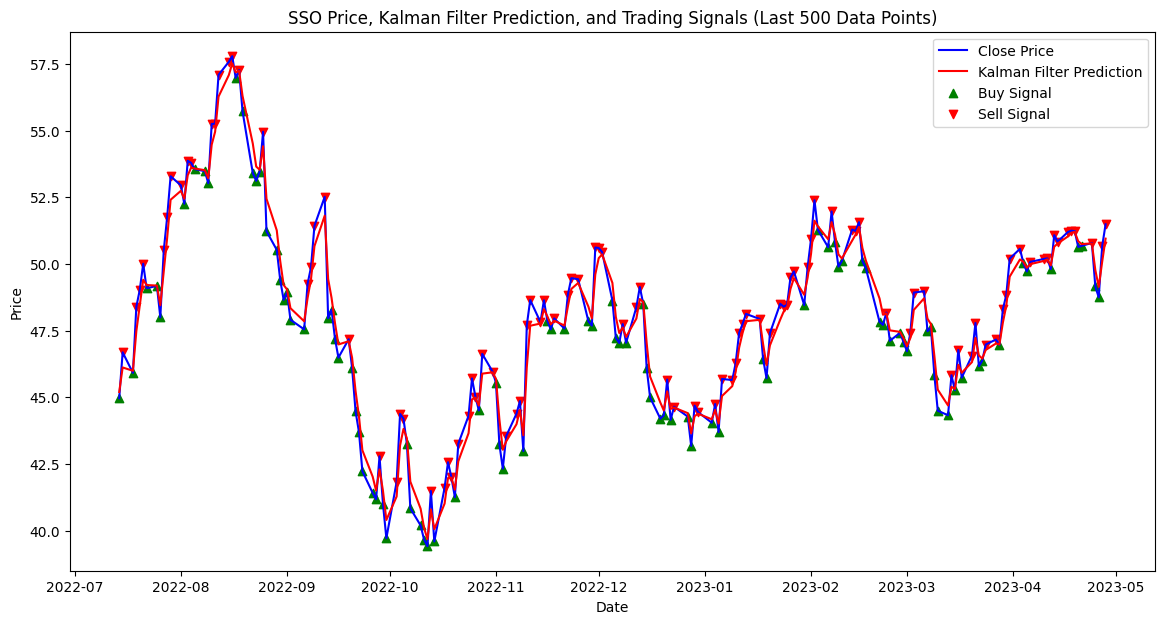

In [3]:
# Slice the dataframe to get the last 500 data points
data_last_500 = data.tail(200)

# Plot the closing prices, Kalman Filter predictions, and trading signals
plt.figure(figsize=(14, 7))

# Plot the actual closing prices
plt.plot(data_last_500.index, data_last_500['Close'], label='Close Price', color='blue')

# Plot the Kalman Filter predictions
plt.plot(data_last_500.index, data_last_500['Kalman_Filter'], label='Kalman Filter Prediction', color='red')

# Plot the trading signals
buy_signals = data_last_500[data_last_500['Signal'] == 1]
sell_signals = data_last_500[data_last_500['Signal'] == -1]
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', alpha=1)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('SSO Price, Kalman Filter Prediction, and Trading Signals (Last 500 Data Points)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()